In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import scipy.stats
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('C:/Users/rohit/Desktop/quaero puzzle/Puzzle/puzzle_train_dataset.csv')
test = pd.read_csv('C:/Users/rohit/Desktop/quaero puzzle/Puzzle/puzzle_test_dataset.csv')

In [3]:
train.head()

,ids,default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,...,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,False,smzX0nxh5QlePvtVf6EAeg==,tHpS8e9F8d9zg3iOQM9tsA==,710.0,104.174961,0.661509,123.015325,0.43,20024.31,...,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,14.0,1.0,0.0,9.0,9.0
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,False,DGCQep2AE5QRkNCshIAlFQ==,RO7MTL+j4PH2gNzbhNTq/A==,330.0,97.880798,0.531115,110.913484,0.23,10046.51,...,xsd3ZdsI3356I3xMxZeiqQ==,oyrt7nHjoQSc58vCxgJF/w==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,75.0,0.0,0.0,3.0,NaN
2,a75638f1-4662-4f4f-044a-d649b676d85d,False,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,360.0,97.908925,0.611086,104.620791,0.30,21228.25,...,/L8vvVesB5WyAv190Hw/rQ==,BMIK35trMYhh9yVrcGg/oQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,5.0,NaN
3,285ce334-3602-42b3-51cb-eebfcba48a09,False,4DLlLW62jReXaqbPaHp1vQ==,tQUTfUyeuGkhRotd+6WjVg==,120.0,100.434557,0.139784,120.134718,0.15,23032.33,...,GW2VZ3dN3OGHSjQ6JkfqQw==,coa2oOrpjxnQl4iyM7dTpQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,5.0,NaN
4,e643bf65-9288-92f2-df13-eed631fe237c,False,4DLlLW62jReXaqbPaHp1vQ==,7h8PTkrlTWUPP3yuyP4rUg==,330.0,103.774638,0.002856,104.320462,0.08,24026.29,...,sjJbkqJS7cXalHLBFA+EOQ==,xTrDMEf/Cnewxc1LO+pfbg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,15.0,0.0,0.0,10.0,10.0


In [4]:
test.head()

,ids,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,...,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,e4366223-7aa2-0904-7a47-66479ae46b2a,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,230.0,101.906686,0.677760,77.245320,0.22,21016.38,36.0,...,GW2VZ3dN3OGHSjQ6JkfqQw==,gupRYCEwfV8MlD+HhQ9c3w==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,73.0,0.0,0.0,15.0,15.0
1,c6416108-c6d7-e6be-c4b5-923dd36c8ec4,4DLlLW62jReXaqbPaHp1vQ==,7h8PTkrlTWUPP3yuyP4rUg==,400.0,96.276632,0.278711,94.980774,0.13,1211.74,36.0,...,0gQEZgRHqS5KSF3oWQrQfw==,ExyXSIu9zSfRKXY18ZnOGA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,39.0,0.0,0.0,11.0,NaN
2,a90d3929-86ec-2414-89ba-543776b0e82b,4DLlLW62jReXaqbPaHp1vQ==,pAzpxkhjPsjWldgSX21+zg==,420.0,98.901695,0.894661,108.136546,0.25,6990.63,36.0,...,1DpYl6dtzY0qE33poow3iw==,886qU4ALtTVHJHC/UTfedg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,33.0,0.0,0.0,21.0,NaN
3,c5b96a7f-389a-28d0-242d-95db05e69da0,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,490.0,95.975994,0.972729,126.120768,0.46,15025.67,60.0,...,7bX4XFXmYqoMspxup0CrKA==,QF6pl3PK1Zb0VJxw2R/HTA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,12.0,0.0,0.0,10.0,10.0
4,1b461faa-926d-565d-b15d-0b452968ac81,8k8UDR4Yx0qasAjkGrUZLw==,d/7Hedyz7ovK9Pn1CYN4+A==,320.0,101.303601,0.234202,107.162760,0.29,7027.81,36.0,...,xsd3ZdsI3356I3xMxZeiqQ==,sfVhE81w8VwY0KuIEpmLTg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,31.0,0.0,0.0,6.0,NaN


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64592 entries, 0 to 64591
Data columns (total 29 columns):
ids                   64592 non-null object
default               59966 non-null object
score_1               63807 non-null object
score_2               63807 non-null object
score_3               63807 non-null float64
score_4               64592 non-null float64
score_5               64592 non-null float64
score_6               64592 non-null float64
risk_rate             63807 non-null float64
amount_borrowed       63807 non-null float64
borrowed_in_months    63807 non-null float64
credit_limit          44839 non-null float64
reason                63801 non-null object
income                63807 non-null float64
sign                  43825 non-null object
gender                57406 non-null object
facebook_profile      58185 non-null object
last_payment          63730 non-null object
end_last_loan         63804 non-null object
state                 63807 non-null object
zi

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 28 columns):
ids                   35000 non-null object
score_1               34592 non-null object
score_2               34592 non-null object
score_3               34592 non-null float64
score_4               35000 non-null float64
score_5               35000 non-null float64
score_6               35000 non-null float64
risk_rate             34592 non-null float64
amount_borrowed       34592 non-null float64
borrowed_in_months    34592 non-null float64
credit_limit          24324 non-null float64
reason                34589 non-null object
income                34592 non-null float64
sign                  23566 non-null object
gender                31187 non-null object
facebook_profile      31425 non-null object
last_payment          34555 non-null object
end_last_loan         34591 non-null object
state                 34592 non-null object
zip                   34592 non-null object
ch

In [7]:
train.describe()

,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
count,63807.000000,64592.000000,64592.000000,64592.000000,63807.000000,63807.000000,63807.000000,44839.000000,6.380700e+04,26554.000000,63605.000000,63789.000000,63807.000000,48141.000000
mean,348.031877,99.997870,0.499220,99.942719,0.296404,13853.282850,41.835347,34562.007560,7.180972e+04,35.174249,0.076959,0.004703,10.681164,11.044847
std,110.064626,3.170869,0.288769,10.034220,0.101549,8105.662643,10.295568,37041.867093,5.124993e+04,21.663679,0.277000,0.079048,4.583902,4.576030
min,0.000000,86.191572,0.000035,60.663039,0.000000,527.070000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,270.000000,97.858659,0.250295,93.210322,0.220000,7762.945000,36.000000,10000.000000,4.501336e+04,17.000000,0.000000,0.000000,7.000000,8.000000
50%,340.000000,100.006042,0.498237,99.975654,0.290000,12023.680000,36.000000,25775.000000,6.139916e+04,32.000000,0.000000,0.000000,10.000000,10.000000
75%,420.000000,102.131648,0.749190,106.698884,0.360000,19384.815000,36.000000,47326.500000,8.602645e+04,50.000000,0.000000,0.000000,13.000000,14.000000
max,990.000000,113.978234,0.999982,142.430069,0.900000,35059.600000,60.000000,613117.000000,5.000028e+06,141.000000,6.000000,5.000000,49.000000,49.000000


In [8]:
test.describe()

,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
count,34592.000000,35000.000000,35000.000000,35000.000000,34592.000000,34592.000000,34592.000000,24324.000000,3.459200e+04,14367.000000,34487.000000,34586.000000,34592.000000,26154.000000
mean,348.503989,99.988983,0.498916,100.076650,0.296673,13745.377994,41.828631,33836.174889,7.103255e+04,34.921069,0.078754,0.004135,10.679926,11.056014
std,109.759025,3.159878,0.288297,10.081779,0.102306,8050.936830,10.291611,36247.500396,5.014472e+04,21.517077,0.278983,0.072225,4.608020,4.618365
min,30.000000,87.772303,0.000015,59.250937,0.030000,922.120000,36.000000,0.000000,4.814090e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,270.000000,97.862933,0.250605,93.229851,0.220000,7594.265000,36.000000,10000.000000,4.500890e+04,17.000000,0.000000,0.000000,7.000000,8.000000
50%,340.000000,99.978303,0.497840,100.076016,0.290000,12020.685000,36.000000,25525.000000,6.021534e+04,32.000000,0.000000,0.000000,10.000000,10.000000
75%,420.000000,102.106157,0.749047,106.813287,0.360000,19027.337500,36.000000,45965.750000,8.503610e+04,50.000000,0.000000,0.000000,13.000000,14.000000
max,880.000000,113.839091,0.999995,138.717736,0.930000,35059.910000,60.000000,902504.000000,3.900034e+06,148.000000,6.000000,4.000000,53.000000,53.000000


In [9]:
big = pd.read_csv('C:/Users/rohit/Desktop/quaero puzzle/Puzzle/big_case_train.csv')
big.columns
train2 = train[['ids','default']]


In [10]:
big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406306 entries, 0 to 1406305
Data columns (total 7 columns):
ids                  1406306 non-null object
credit_line          1406306 non-null int64
month                1406306 non-null int64
spends               1406306 non-null float64
revolving_balance    1406306 non-null float64
card_request         1406306 non-null int64
minutes_cs           1406306 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 75.1+ MB


In [11]:
big.head()

,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,1285,0,0.00,0.00,1,0.0
1,810e3277-619e-3154-7ba0-ebddfc5f7ea9,1285,1,0.00,0.00,0,0.0
2,810e3277-619e-3154-7ba0-ebddfc5f7ea9,1285,2,196.69,13.33,0,0.0
3,810e3277-619e-3154-7ba0-ebddfc5f7ea9,1285,3,151.73,106.26,0,0.0
4,810e3277-619e-3154-7ba0-ebddfc5f7ea9,1285,4,982.02,0.00,0,0.0


In [12]:
bignew = pd.merge(big,train2,on ='ids',how='left')

In [13]:
bignew.head()

,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs,default
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,1285,0,0.00,0.00,1,0.0,False
1,810e3277-619e-3154-7ba0-ebddfc5f7ea9,1285,1,0.00,0.00,0,0.0,False
2,810e3277-619e-3154-7ba0-ebddfc5f7ea9,1285,2,196.69,13.33,0,0.0,False
3,810e3277-619e-3154-7ba0-ebddfc5f7ea9,1285,3,151.73,106.26,0,0.0,False
4,810e3277-619e-3154-7ba0-ebddfc5f7ea9,1285,4,982.02,0.00,0,0.0,False


In [14]:
sub = pd.DataFrame(bignew.groupby(by = ['ids'], as_index = False)['month'].max())

In [15]:
sub.head()

,ids,month
0,0003da40-123b-031a-63b3-f7c9f18516ab,17
1,0004a450-07bd-c652-8473-4e9dedcff8b8,18
2,0005967a-2048-6197-a054-30954efe93b1,8
3,000779f6-0dd7-ae04-80c6-fcc030b909bc,7
4,0007cefd-68d7-7627-7286-018fda9465af,23


In [16]:
subnew = pd.merge(bignew,sub, on =['ids','month'], how ='right')

In [17]:
subnew.head()

,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs,default
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,1285,26,174.92,0.09,0,2.57,False
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,19,15896.66,98.89,0,0.00,False
2,a75638f1-4662-4f4f-044a-d649b676d85d,12717,21,6274.68,0.01,0,0.00,False
3,285ce334-3602-42b3-51cb-eebfcba48a09,17819,28,16384.20,24.65,0,0.00,False
4,e643bf65-9288-92f2-df13-eed631fe237c,4997,28,4373.44,0.00,0,0.00,False


In [18]:
subnew2 = subnew[subnew['default']==True]

In [19]:
subnew2.head()

,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs,default
55082,acbb594c-fdfa-feee-5a57-a21f077bff9b,1235,10,96.68,0.00,0,0.00,True
55083,95ba212b-db72-110e-d394-6ecf397fd32b,6470,12,427.03,300.07,0,0.00,True
55084,ff860c5e-3452-d752-daa2-582180a64802,3972,12,3928.91,0.00,0,4.44,True
55085,7f93590f-4a91-aec4-5062-cb1ba2c16a84,4937,3,777.00,0.00,0,17.77,True
55086,a390d111-8c65-6e1f-9566-91d815e9a4a1,6484,11,1089.31,35.56,0,0.00,True


In [20]:
subnew2['revolving_balance'] = -subnew2['revolving_balance']

In [21]:
subnew2['Net'] = subnew2['spends']*0.005+subnew2['revolving_balance']-subnew2['card_request']*10- subnew2['minutes_cs']*2.5

In [22]:
subnew2.head()

,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs,default,Net
55082,acbb594c-fdfa-feee-5a57-a21f077bff9b,1235,10,96.68,-0.00,0,0.00,True,0.48340
55083,95ba212b-db72-110e-d394-6ecf397fd32b,6470,12,427.03,-300.07,0,0.00,True,-297.93485
55084,ff860c5e-3452-d752-daa2-582180a64802,3972,12,3928.91,-0.00,0,4.44,True,8.54455
55085,7f93590f-4a91-aec4-5062-cb1ba2c16a84,4937,3,777.00,-0.00,0,17.77,True,-40.54000
55086,a390d111-8c65-6e1f-9566-91d815e9a4a1,6484,11,1089.31,-35.56,0,0.00,True,-30.11345


In [23]:
bignew = bignew.groupby(by = ['ids'],as_index =False)['spends','revolving_balance','card_request','minutes_cs'].sum()

In [24]:
bignew = pd.merge(bignew,train,on ='ids',how='left')

In [25]:
bignew.head()

,ids,spends,revolving_balance,card_request,minutes_cs,default,score_1,score_2,score_3,score_4,...,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,0003da40-123b-031a-63b3-f7c9f18516ab,83373.21,40593.92,3,21.50,False,DGCQep2AE5QRkNCshIAlFQ==,RO7MTL+j4PH2gNzbhNTq/A==,480.0,97.445252,...,VafbDA6D5W2TpGMAUJbW8Q==,MN3r+M65Vz4iIYh9Nntjjg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiHyTx...,n+xK9CfX0bCn77lClTWviw==,47.0,1.0,0.0,13.0,13.0
1,0004a450-07bd-c652-8473-4e9dedcff8b8,186575.53,20116.58,1,52.71,False,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,320.0,100.068787,...,0lQuvmygO68ZFXZjzHEOww==,e4zblouPEIx3n9BVs3w7aQ==,NCqL3QBx0pscDnx3ixKwXg==,NaN,nSpvDsIsslUaX6GE6m6eQA==,NaN,0.0,0.0,6.0,6.0
2,0005967a-2048-6197-a054-30954efe93b1,46426.93,3856.89,1,54.37,True,8k8UDR4Yx0qasAjkGrUZLw==,OlDYtdljgSSYM/M1L2CRaQ==,280.0,97.099151,...,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,30.0,1.0,0.0,6.0,6.0
3,000779f6-0dd7-ae04-80c6-fcc030b909bc,15947.04,1000.69,3,25.84,True,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,400.0,96.949794,...,rrVbgRNTRyB6auEycsRrpA==,MGre4t/HXqyRfPOprm3izA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,10.0,10.0
4,0007cefd-68d7-7627-7286-018fda9465af,22192.20,464.58,2,92.73,False,8k8UDR4Yx0qasAjkGrUZLw==,OlDYtdljgSSYM/M1L2CRaQ==,420.0,102.052196,...,QCVqG0wT4xPLQuiTIExO2w==,R0qubXDW/aQ3fwbaE7JtgA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,16.0,0.0,0.0,8.0,8.0


In [26]:
bignew4 = bignew[bignew['default']==True]

In [27]:
bignew['revolving_balance'] = bignew['revolving_balance']-big['revolving_balance'] 

In [28]:
subnew5 = subnew2[['ids','spends','revolving_balance','card_request','minutes_cs']]
bignew5 = bignew4[['ids','spends','revolving_balance','card_request','minutes_cs']]

In [29]:
bignew6 = bignew5.set_index('ids') - subnew5.set_index('ids')

In [30]:
bignew6['Net'] = bignew6['spends']*0.005+bignew6['revolving_balance']*0.165-bignew6['card_request']*10- bignew6['minutes_cs']*2.5
subnew6 = subnew2[['ids','spends','revolving_balance','card_request','minutes_cs','Net']]

In [31]:
bignew7 = bignew6 + subnew6.set_index('ids')

In [32]:
bignew9 = bignew[bignew['default'] == False]

In [33]:
bignew10 = bignew9[['ids','spends','revolving_balance','card_request','minutes_cs']]

In [34]:
bignew10['Net'] = bignew10['spends']*0.005+bignew10['revolving_balance']*0.165-bignew10['card_request']*10- bignew10['minutes_cs']*2.5


In [35]:
bignew10 = bignew10.set_index('ids')


In [36]:
bignew10 = bignew10.append(bignew7)


In [37]:
bignew10 = bignew10.reset_index()


In [38]:
big = bignew10[['ids','Net']]

In [39]:
big.head()

,ids,Net
0,0003da40-123b-031a-63b3-f7c9f18516ab,7031.11285
1,0004a450-07bd-c652-8473-4e9dedcff8b8,4110.33835
2,0007cefd-68d7-7627-7286-018fda9465af,-64.20830
3,00080634-5c14-0e3f-5404-7dbfbc2ba91c,1776.85115
4,00081f91-63e4-b9ef-e859-af1501bbdd62,440.72720


In [40]:
#Distribution of target variable

In [41]:
total = pd.DataFrame(train.default.value_counts(dropna = False))
percent = pd.DataFrame(round(train.default.value_counts(dropna = False)/len(train)*100,2))
pd.concat([total,percent],axis = 1,keys = ['total','percent'])

,total,percent
,default,default
False,50456,78.11
True,9510,14.72
NaN,4626,7.16


In [42]:
#The dependent variable has a class imbalance problem with 
#78 percent of values as Non defaulters and 14 percent as defaulters and NaN 7 percent.
#So we have to over sample the data before modelling

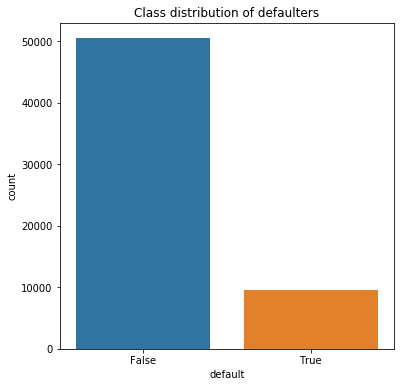

In [43]:
fig,ax = plt.subplots(figsize = (6,6), ncols = 1)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class distribution of defaulters')
sns.countplot(x = train.default,ax = ax)

In [44]:
#There are two date columns. Lets change them into year and month columns and see if can be used ina better way


In [45]:
train['last_payment_year'] = train.last_payment.str.split('-').str[0]
train['last_payment_month'] = train.last_payment.str.split('-').str[1]
test['last_payment_year'] = train.last_payment.str.split('-').str[0]
test['last_payment_month'] = train.last_payment.str.split('-').str[1]

In [46]:
#Since day is always 1. Let us ignore it

In [47]:
train['end_last_loan_year'] = train.end_last_loan.str.split('-').str[0]
train['end_last_loan_month'] = train.end_last_loan.str.split('-').str[1]
test['end_last_loan_year'] = test.end_last_loan.str.split('-').str[0]
test['end_last_loan_month'] = test.end_last_loan.str.split('-').str[1]

In [48]:
train.drop(labels = ['last_payment','end_last_loan'],axis =1,inplace=True)
test.drop(labels = ['last_payment','end_last_loan'],axis =1,inplace=True)


In [49]:
train.head()

,ids,default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,...,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,last_payment_year,last_payment_month,end_last_loan_year,end_last_loan_month
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,False,smzX0nxh5QlePvtVf6EAeg==,tHpS8e9F8d9zg3iOQM9tsA==,710.0,104.174961,0.661509,123.015325,0.43,20024.31,...,n+xK9CfX0bCn77lClTWviw==,14.0,1.0,0.0,9.0,9.0,2014,10,2015,11
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,False,DGCQep2AE5QRkNCshIAlFQ==,RO7MTL+j4PH2gNzbhNTq/A==,330.0,97.880798,0.531115,110.913484,0.23,10046.51,...,n+xK9CfX0bCn77lClTWviw==,75.0,0.0,0.0,3.0,NaN,2014,03,2014,03
2,a75638f1-4662-4f4f-044a-d649b676d85d,False,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,360.0,97.908925,0.611086,104.620791,0.30,21228.25,...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,5.0,NaN,2016,09,2017,03
3,285ce334-3602-42b3-51cb-eebfcba48a09,False,4DLlLW62jReXaqbPaHp1vQ==,tQUTfUyeuGkhRotd+6WjVg==,120.0,100.434557,0.139784,120.134718,0.15,23032.33,...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,5.0,NaN,2015,01,2015,01
4,e643bf65-9288-92f2-df13-eed631fe237c,False,4DLlLW62jReXaqbPaHp1vQ==,7h8PTkrlTWUPP3yuyP4rUg==,330.0,103.774638,0.002856,104.320462,0.08,24026.29,...,N5/CE7lSkAfB04hVFFwllw==,15.0,0.0,0.0,10.0,10.0,2016,10,2017,03


In [50]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64592 entries, 0 to 64591
Data columns (total 31 columns):
ids                    64592 non-null object
default                59966 non-null object
score_1                63807 non-null object
score_2                63807 non-null object
score_3                63807 non-null float64
score_4                64592 non-null float64
score_5                64592 non-null float64
score_6                64592 non-null float64
risk_rate              63807 non-null float64
amount_borrowed        63807 non-null float64
borrowed_in_months     63807 non-null float64
credit_limit           44839 non-null float64
reason                 63801 non-null object
income                 63807 non-null float64
sign                   43825 non-null object
gender                 57406 non-null object
facebook_profile       58185 non-null object
state                  63807 non-null object
zip                    63807 non-null object
channel                6380

In [51]:
#Converting month and year from object to numeric

In [52]:
train.last_payment_year = pd.to_numeric(train.last_payment_year)
train.last_payment_month = pd.to_numeric(train.last_payment_month)
test.last_payment_year = pd.to_numeric(test.last_payment_year)
test.last_payment_month = pd.to_numeric(test.last_payment_month)
train.end_last_loan_year = pd.to_numeric(train.end_last_loan_year)
train.end_last_loan_month = pd.to_numeric(train.end_last_loan_month)
test.end_last_loan_year = pd.to_numeric(test.end_last_loan_year)
test.end_last_loan_month = pd.to_numeric(test.end_last_loan_month)

In [53]:
#Numeric variables

#Let us plot corr plot for all the numeric variables and check

In [54]:
traincor = train.corr()
testcor = test.corr()

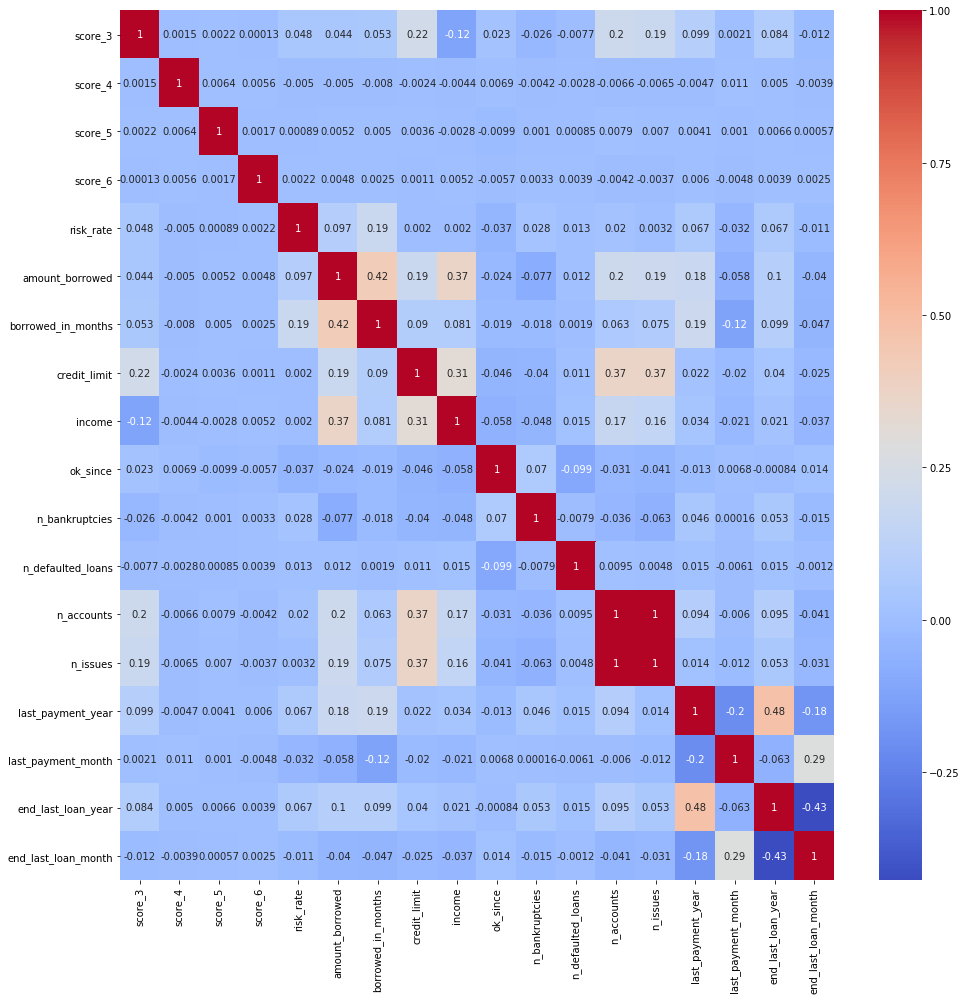

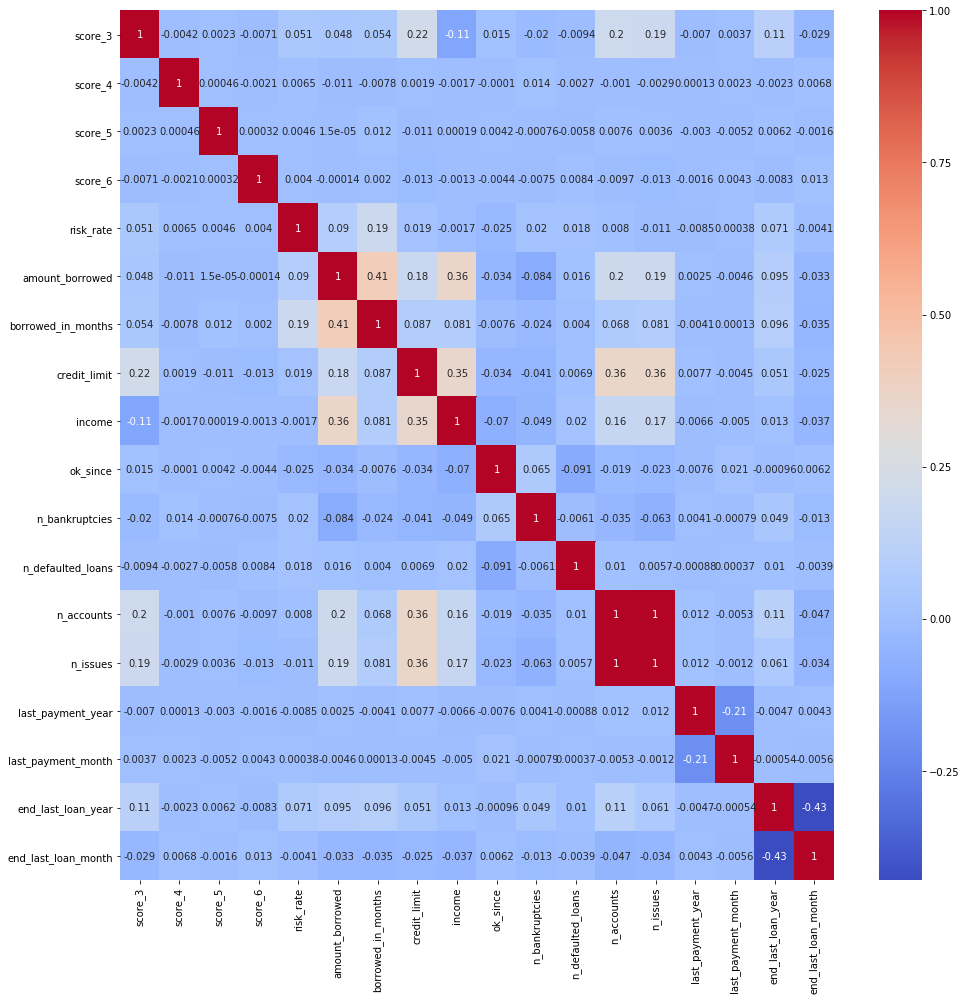

In [55]:
fig,ax = plt.subplots(figsize = (16,16))
sns.heatmap(traincor,cmap ='coolwarm',annot=True,ax=ax)
fig,ax = plt.subplots(figsize = (16,16))
sns.heatmap(testcor,cmap ='coolwarm',annot =True,ax =ax)

In [56]:
#Could find some correlations between some variables. Let us try using these relations to impute missing values


In [57]:
#Missing values


In [58]:
#default
#Let us  simply remove those rows from the train data
train = train.dropna(subset =['default'],axis =0)
train.default.value_counts()

False    50456
True      9510
Name: default, dtype: int64

In [59]:
#Now Let us check for the total number of missing values

In [60]:
total = train.isnull().sum().sort_values(ascending = False)
percent = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100,2)
pd.concat([total,percent],axis = 1,keys = ['Total','Percent'])

,Total,Percent
ok_since,35089,58.51
sign,18938,31.58
credit_limit,18779,31.32
n_issues,15580,25.98
facebook_profile,5971,9.96
job_name,3791,6.32
gender,2996,5.00
n_bankruptcies,202,0.34
last_payment_month,77,0.13
last_payment_year,77,0.13


In [61]:
total = test.isnull().sum().sort_values(ascending = False)
percent= round(test.isnull().sum().sort_values(ascending = False)/len(test)*100,2)
pd.concat([total,percent], axis =1,keys = ['Total','Percent'])

,Total,Percent
ok_since,20633,58.95
sign,11434,32.67
credit_limit,10676,30.50
n_issues,8846,25.27
gender,3813,10.89
facebook_profile,3575,10.21
job_name,2511,7.17
n_bankruptcies,513,1.47
last_payment_month,467,1.33
last_payment_year,467,1.33


In [62]:
#There are almost equal percent of missing values in train and test sets.
#test has 408 missing values in many columns
#Let us check if they belong to same row

In [63]:
check = test[test['score_3'].isna()]

In [64]:
check.isna().sum()

ids                      0
score_1                408
score_2                408
score_3                408
score_4                  0
score_5                  0
score_6                  0
risk_rate              408
amount_borrowed        408
borrowed_in_months     408
credit_limit           408
reason                 408
income                 408
sign                   164
gender                 358
facebook_profile        30
state                  408
zip                    408
channel                408
job_name               408
real_state             408
ok_since               408
n_bankruptcies         408
n_defaulted_loans      408
n_accounts             408
n_issues               408
last_payment_year        3
last_payment_month       3
end_last_loan_year     408
end_last_loan_month    408
dtype: int64

In [65]:
#They belong to the same row
#Let us remove them 

In [66]:
for i in range(0,len(test)):
    if np.isnan(test['score_3'][i]):
        test.drop(index = i,axis = 0,inplace=True)

In [67]:
total = test.isnull().sum().sort_values(ascending = False)
percent= round(test.isnull().sum().sort_values(ascending = False)/len(test)*100,2)
pd.concat([total,percent], axis =1,keys = ['Total','Percent'])

,Total,Percent
ok_since,20225,58.47
sign,11270,32.58
credit_limit,10268,29.68
n_issues,8438,24.39
facebook_profile,3545,10.25
gender,3455,9.99
job_name,2103,6.08
last_payment_month,464,1.34
last_payment_year,464,1.34
n_bankruptcies,105,0.30


In [68]:
##BAM removed most of the na features in test

#Lets see whether to impute or remove other missing values

In [69]:
#ok_since
#ok_since has almost 60 percent missing values. 
#It doesnt have any significant relationship with any other numeric variables
# Cannot impute with mean for 60 percent of values
# Let us drop the column

In [70]:
train.drop(labels='ok_since',axis =1,inplace=True)
test.drop(labels= 'ok_since',axis =1,inplace=True) 

In [71]:
#sign
#Let us remove birth sign from the dataset as it would not have any effect on our target variable

In [74]:
train.drop(labels =['sign'], axis= 1, inplace=True)
test.drop(labels=['sign'],axis = 1,inplace=True)

In [75]:
#creditlimit
total = pd.DataFrame(train.credit_limit.value_counts(dropna = False,ascending=False))
percent = pd.DataFrame(round(train.credit_limit.value_counts(dropna = False,ascending=False)*100/len(train),2))
pd.concat([total,percent],axis =1,keys =['Total','Percent'])

,Total,Percent
,credit_limit,credit_limit
NaN,18779,31.32
0.0,7053,11.76
10000.0,189,0.32
15000.0,114,0.19
5000.0,108,0.18
20000.0,96,0.16
25000.0,96,0.16
12000.0,75,0.13
6000.0,69,0.12


In [76]:
#There are around 31 percent of missing values
#credit_limit has 36 percent correlation with n_issues and n_accounts but they dont make any business sense 
#credit_limit has 31 percent correlation with income. Let us try to impute using income 
#as it makes sense

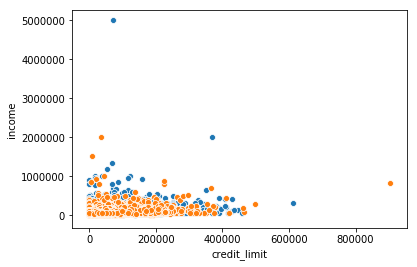

In [77]:
sns.scatterplot(x = 'credit_limit',y ='income',data =train)
sns.scatterplot(x = 'credit_limit',y ='income',data=test)


In [78]:
# Couldnt find any pattern in the scatter but this could be due to the effect of other variables.
#Let us break the income into bins and impute credit_limit based on the mean of credit_limit in the bin

In [79]:
train.sort_values(by= 'income',ascending = True,inplace=True)

In [80]:
for i in range(0,10):
    p = 6000*i
    q = 6000*(i+1)
    train.credit_limit[p:q].fillna(round(train.credit_limit[p:q].mean(),0),inplace=True)
train.credit_limit.isna().sum()
test.sort_values(by= 'income',ascending = True,inplace=True)

for i in range(0,6):
    p = 6000*i
    q = 6000*(i+1)
    test.credit_limit[p:q].fillna(round(test.credit_limit[p:q].mean(),0),inplace=True)

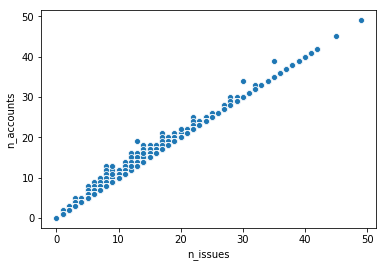

In [81]:
sns.scatterplot(x = 'n_issues',y='n_accounts', data =train)

In [82]:
#n_issues
#n_issues and n_accounts are 99.9 percent correlated. so let us keep n_accounts which doesnt have missing values
train.drop(labels=(['n_issues']),axis =1, inplace=True)
test.drop(labels =(['n_issues']),axis=1,inplace=True)

In [83]:
#facebook_profile
total = pd.DataFrame(train.facebook_profile.value_counts(dropna = False,ascending=False))
percent = pd.DataFrame(round(train.facebook_profile.value_counts(dropna = False,ascending=False)*100/len(train),2))
pd.concat([total,percent],axis =1,keys =['Total','Percent'])


,Total,Percent
,facebook_profile,facebook_profile
False,33997,56.69
True,19998,33.35
NaN,5971,9.96


In [84]:
total = pd.DataFrame(test.facebook_profile.value_counts(dropna = False,ascending=False))
percent = pd.DataFrame(round(test.facebook_profile.value_counts(dropna = False,ascending=False)*100/len(test),2))
pd.concat([total,percent],axis =1,keys =['Total','Percent'])

,Total,Percent
,facebook_profile,facebook_profile
False,19283,55.74
True,11764,34.01
NaN,3545,10.25


In [85]:
#facebook_profile is a biclass categorical variable      
#It has 56 percent False and 33 percent True in train and 55 34 in test
#10 percent of values are missing in both train and test
#Let us make it a seperate class Unknown and check if the variable contributes for prediction
#and decide whether to keep or remove

In [86]:
train.facebook_profile.fillna('U',inplace=True)
test.facebook_profile.fillna('U',inplace=True)

In [87]:
train.facebook_profile.isna().sum()
test.facebook_profile.isna().sum()

0

In [88]:
#job_name
total = pd.DataFrame(train.job_name.value_counts(dropna = False,ascending=False))
percent = pd.DataFrame(round(train.job_name.value_counts(dropna = False,ascending=False)*100/len(train),2))
pd.concat([total,percent],axis =1,keys =['Total','Percent'])


,Total,Percent
,job_name,job_name
NaN,3791,6.32
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIVf4E/iI7qK+Lfl5hxoWW2A=,220,0.37
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIbOy82w5K5LALfp4MHskDUE=,155,0.26
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIaUIfpgwbYh438CvSsT5QB8=,149,0.25
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIfeSCTDWhw2hS0GDfQEUVwM=,109,0.18
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIS7jap0hM5abNdcL6dk7Ifw=,108,0.18
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIa6KOvl8Xp6F2JH3Vt47kH0=,93,0.16
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhfABZk30mT6nuzlBzfA+t9szMup/wCQYfBw/WsldHV9k=,81,0.14
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIb4ADj/ykkhgM886TEQ8yrI=,80,0.13


In [89]:
total = pd.DataFrame(test.job_name.value_counts(dropna = False,ascending=False))
percent = pd.DataFrame(round(test.job_name.value_counts(dropna = False,ascending=False)*100/len(test),2))
pd.concat([total,percent],axis =1,keys =['Total','Percent'])

,Total,Percent
,job_name,job_name
NaN,2103,6.08
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIVf4E/iI7qK+Lfl5hxoWW2A=,125,0.36
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIaUIfpgwbYh438CvSsT5QB8=,109,0.32
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIbOy82w5K5LALfp4MHskDUE=,105,0.30
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIfeSCTDWhw2hS0GDfQEUVwM=,77,0.22
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIV56G3kjZxQ0yMeb3IU2UKE=,62,0.18
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIS7jap0hM5abNdcL6dk7Ifw=,62,0.18
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIXstD7GzCRZcMVXrpdafjCk=,59,0.17
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhfABZk30mT6nuzlBzfA+t9szMup/wCQYfBw/WsldHV9k=,56,0.16


In [90]:
#job_name in both train and test have 6 and 7 percent of missing values respectively.
#job_name has a total of 42264 unique values and 25704 unique values in test
#Let us add a unknown level in both and check if this feature contributes in the prediction

In [91]:
train.job_name.fillna('U',inplace=True)
test.job_name.fillna('U',inplace=True)
train.job_name.isna().sum()
test.job_name.isna().sum()

0

In [92]:
#gender
total = pd.DataFrame(train.gender.value_counts(dropna = False,ascending=False))
percent = pd.DataFrame(round(train.gender.value_counts(dropna = False,ascending=False)*100/len(train),2))
pd.concat([total,percent],axis =1,keys =['Total','Percent'])


,Total,Percent
,gender,gender
m,38497,64.20
f,18473,30.81
NaN,2996,5.00


In [93]:
total = pd.DataFrame(test.gender.value_counts(dropna = False,ascending=False))
percent = pd.DataFrame(round(test.gender.value_counts(dropna = False,ascending=False)*100/len(test),2))
pd.concat([total,percent],axis =1,keys =['Total','Percent'])

,Total,Percent
,gender,gender
m,21070,60.91
f,10067,29.10
NaN,3455,9.99


In [94]:
#Gender has around 64 percent of Male and 30 percent of female in train 
#60 percent of male and 28 percent of female in test
#5 percent of missing values in train and 10 percent of missing in test
#Lets make another level and impute

In [95]:
train.gender.fillna('U',inplace=True)
test.gender.fillna('U',inplace=True)

In [96]:
train.gender.isna().sum()
test.gender.isna().sum()

0

In [97]:
#n_bankruptcies
total = pd.DataFrame(train.n_bankruptcies.value_counts(dropna = False,ascending=False))
percent = pd.DataFrame(round(train.n_bankruptcies.value_counts(dropna = False,ascending=False)*100/len(train),2))
pd.concat([total,percent],axis =1,keys =['Total','Percent'])

,Total,Percent
,n_bankruptcies,n_bankruptcies
0.0,55240,92.12
1.0,4437,7.40
NaN,202,0.34
2.0,68,0.11
3.0,11,0.02
4.0,4,0.01
5.0,2,0.00
6.0,2,0.00


In [98]:
total = pd.DataFrame(test.n_bankruptcies.value_counts(dropna = False,ascending=False))
percent = pd.DataFrame(round(test.n_bankruptcies.value_counts(dropna = False,ascending=False)*100/len(test),2))
pd.concat([total,percent],axis =1,keys =['Total','Percent'])

,Total,Percent
,n_bankruptcies,n_bankruptcies
0.0,31841,92.05
1.0,2589,7.48
NaN,105,0.30
2.0,49,0.14
3.0,5,0.01
4.0,2,0.01
6.0,1,0.00


In [99]:
#n_bankruptcies is not correlated with any other numeric varibale much.
#n_bankruptcies has 0.34 percent of missing in train and 1.47 in test
# As bankruptcies tend to defaulters.
#Let us impute bankruptcies based on our target column
#Let us give 0 to non defaulters and 1 to defaulters in train

In [100]:
pd.crosstab(train['n_bankruptcies'],train['default'])

default,False,True
n_bankruptcies,,
0.0,46548,8692
1.0,3664,773
2.0,54,14
3.0,9,2
4.0,3,1
5.0,1,1
6.0,1,1


In [101]:
indices = train[train['default']==True]['n_bankruptcies'].index
for i in indices:
    if np.isnan(train['n_bankruptcies'][i]):
        train['n_bankruptcies'][i]=1
indices = train[train['default']==False]['n_bankruptcies'].index
for i in indices:
    if np.isnan(train['n_bankruptcies'][i]):
        train['n_bankruptcies'][i]=0

In [102]:
#As test set doesnt have default values let us impute with 0s 
test.n_bankruptcies.fillna(0,inplace=True)
test.n_bankruptcies.isna().sum()

0

In [103]:
total = pd.DataFrame(train.n_defaulted_loans.value_counts(dropna = False,ascending=False))
percent = pd.DataFrame(round(train.n_defaulted_loans.value_counts(dropna = False,ascending=False)*100/len(train),2))
pd.concat([total,percent],axis =1,keys =['Total','Percent'])

,Total,Percent
,n_defaulted_loans,n_defaulted_loans
0.0,59706,99.57
1.0,211,0.35
2.0,26,0.04
NaN,18,0.03
3.0,4,0.01
5.0,1,0.00


In [104]:
total = pd.DataFrame(test.n_defaulted_loans.value_counts(dropna = False,ascending=False))
percent = pd.DataFrame(round(test.n_defaulted_loans.value_counts(dropna = False,ascending=False)*100/len(test),2))
pd.concat([total,percent],axis =1,keys =['Total','Percent'])

,Total,Percent
,n_defaulted_loans,n_defaulted_loans
0.0,34458,99.61
1.0,116,0.34
2.0,10,0.03
NaN,6,0.02
3.0,1,0.00
4.0,1,0.00


In [105]:
train.n_defaulted_loans.fillna(0,inplace=True)
test.n_defaulted_loans.fillna(0,inplace=True)
train.n_defaulted_loans.isna().sum()
test.n_defaulted_loans.isna().sum()

0

In [106]:
#reason
#reason has 3 missing values in test and 5 in train. Let us replace them with mode
p = 'mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIXuusuYraWV4rGB3v/7WqHKeKq5W600DOWmwjMTqsrAW'
q = 'mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIXuusuYraWV4rGB3v/7WqHKeKq5W600DOWmwjMTqsrAW'
train.reason.fillna(p,inplace=True)
test.reason.fillna(q,inplace=True)
train.reason.isna().sum()
test.reason.isna().sum()

0

In [107]:
#end_last_loan_year and end_last_loan_month has 3 in train and 1 in test
#let us impute with mode value
p = train.end_last_loan_year.mode()
q = train.end_last_loan_month.mode()
r = test.end_last_loan_year.mode()
s = test.end_last_loan_month.mode()
train.end_last_loan_year.fillna(p[0],inplace=True)
train.end_last_loan_month.fillna(q[0],inplace=True)
test.end_last_loan_year.fillna(r[0],inplace=True)
test.end_last_loan_month.fillna(s[0],inplace=True)

In [108]:
#last_payment_year, last_payment_month is imputed with mode
train.last_payment_year.fillna(train.last_payment_year.mode()[0],inplace=True)
train.last_payment_month.fillna(train.last_payment_month.mode()[0],inplace=True)
test.last_payment_year.fillna(test.last_payment_year.mode()[0],inplace=True)
test.last_payment_month.fillna(test.last_payment_month.mode()[0],inplace=True)

In [109]:
train.isna().sum()


ids                    0
default                0
score_1                0
score_2                0
score_3                0
score_4                0
score_5                0
score_6                0
risk_rate              0
amount_borrowed        0
borrowed_in_months     0
credit_limit           0
reason                 0
income                 0
gender                 0
facebook_profile       0
state                  0
zip                    0
channel                0
job_name               0
real_state             0
n_bankruptcies         0
n_defaulted_loans      0
n_accounts             0
last_payment_year      0
last_payment_month     0
end_last_loan_year     0
end_last_loan_month    0
dtype: int64

In [110]:

test.isna().sum()

ids                    0
score_1                0
score_2                0
score_3                0
score_4                0
score_5                0
score_6                0
risk_rate              0
amount_borrowed        0
borrowed_in_months     0
credit_limit           0
reason                 0
income                 0
gender                 0
facebook_profile       0
state                  0
zip                    0
channel                0
job_name               0
real_state             0
n_bankruptcies         0
n_defaulted_loans      0
n_accounts             0
last_payment_year      0
last_payment_month     0
end_last_loan_year     0
end_last_loan_month    0
dtype: int64

In [111]:
train = pd.merge(train,big,on='ids')

In [112]:
train.nunique()

ids                    59966
default                    2
score_1                    7
score_2                   35
score_3                   87
score_4                59966
score_5                59966
score_6                59966
risk_rate                 81
amount_borrowed        50484
borrowed_in_months         2
credit_limit           26245
reason                 19496
income                 54273
gender                     3
facebook_profile           3
state                     50
zip                      830
channel                    1
job_name               42264
real_state                 5
n_bankruptcies             7
n_defaulted_loans          5
n_accounts                45
last_payment_year         10
last_payment_month        12
end_last_loan_year        11
end_last_loan_month       12
Net                    58773
dtype: int64

In [113]:
#ids are unique values
#Let us copy and drop them
trainids = train.ids
testids = test.ids
train.drop(labels =['ids'],axis =1,inplace=True)
test.drop(labels=['ids'],axis=1,inplace=True)


In [114]:
#channel has only one value
#Let us remove it as it doesnt contribute to prediction
train.drop(labels =['channel'],axis=1,inplace=True)
test.drop(labels =['channel'],axis=1,inplace=True)

In [115]:
#Outlier detection

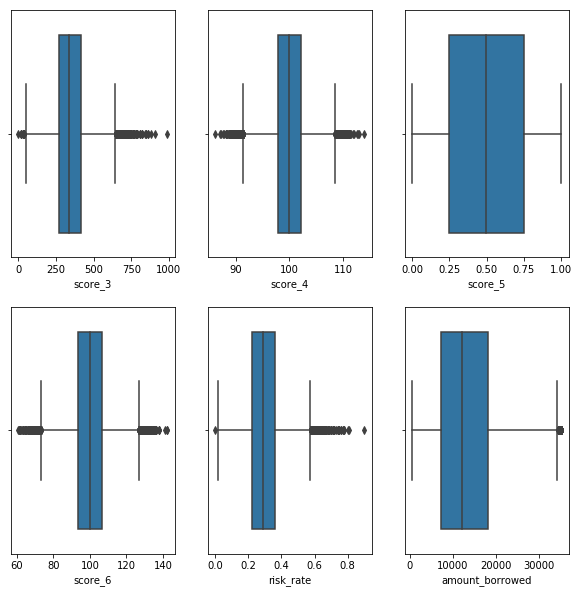

In [116]:
fig,ax = plt.subplots(figsize =(10,10),ncols = 3,nrows =2)
sns.boxplot(train.score_3,ax=ax[0,0])
sns.boxplot(train.score_4,ax=ax[0,1])
sns.boxplot(train.score_5,ax=ax[0,2])
sns.boxplot(train.score_6,ax=ax[1,0])
sns.boxplot(train.risk_rate,ax=ax[1,1])
sns.boxplot(train.amount_borrowed,ax=ax[1,2])

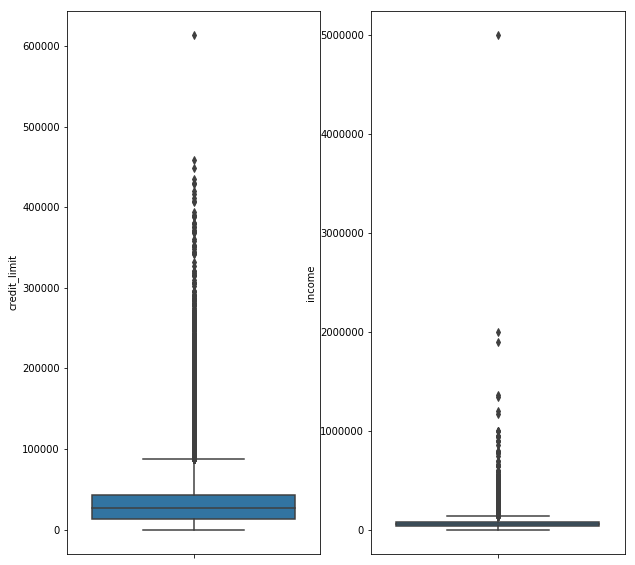

In [117]:
fig,ax = plt.subplots(figsize =(10,10),ncols =2)
sns.boxplot(y =train.credit_limit,ax=ax[0])
sns.boxplot(y =train.income,ax=ax[1])

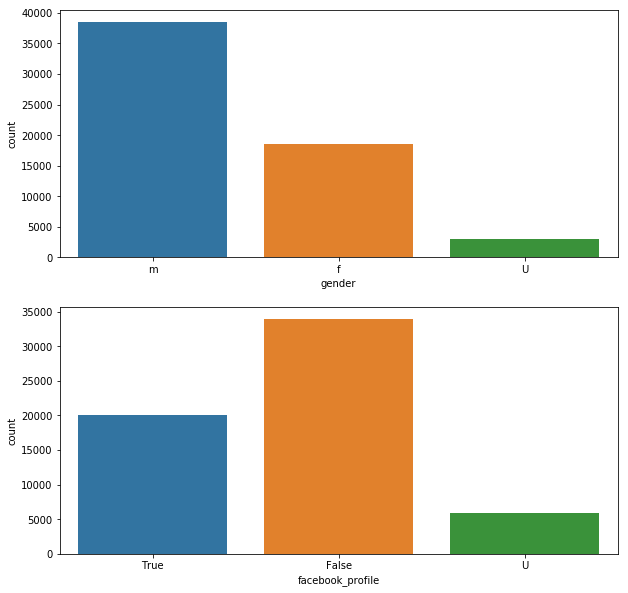

In [139]:
fig,ax = plt.subplots(figsize =(10,10),nrows=2)

sns.countplot(train.gender,ax = ax[0])
sns.countplot(train.facebook_profile,ax =ax[1])

In [118]:
col = train[['score_3', 'score_4', 'score_5', 'score_6', 'risk_rate',
       'amount_borrowed', 'borrowed_in_months', 'credit_limit', 'income']]
col2 = test[['score_3', 'score_4', 'score_5', 'score_6', 'risk_rate',
       'amount_borrowed', 'borrowed_in_months', 'credit_limit', 'income']]

In [119]:
for i in col:
    percentiles = train[i].quantile([0.,0.25,0.75,1]).values
    iqr = (percentiles[2]-percentiles[1])
    ma = percentiles[2]+1.5*iqr
    mi = percentiles[1]-1.5*iqr
    train[train[i] <= mi].loc[i] = percentiles[0]
    train[train[i] >= ma].loc[i] = percentiles[3]

In [120]:
for i in col:
    percentiles = test[i].quantile([0.,0.25,0.75,1]).values
    iqr = (percentiles[2]-percentiles[1])
    ma = percentiles[2]+1.5*iqr
    mi = percentiles[1]-1.5*iqr
    test[test[i] <= mi].loc[i] = percentiles[0]
    test[test[i] >= ma].loc[i] = percentiles[3]

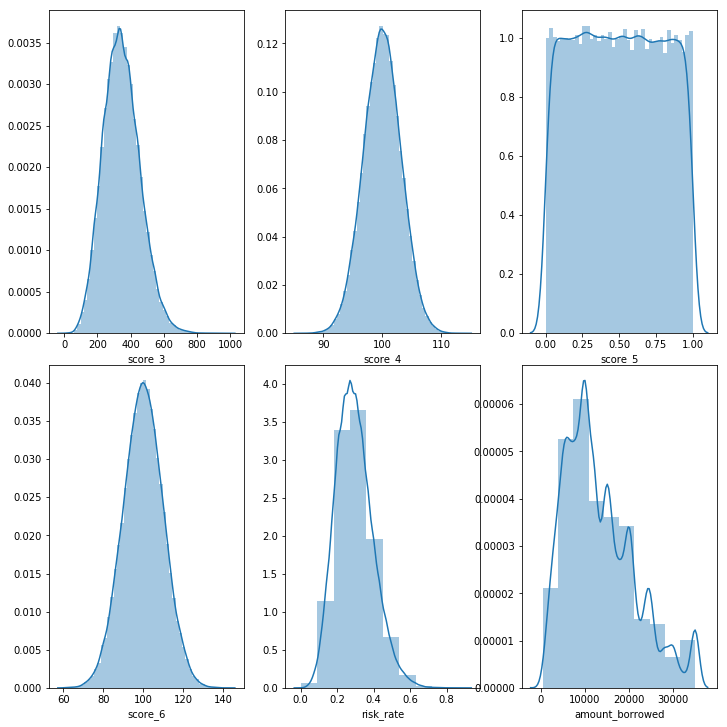

In [121]:
####Univariate analysis
#numeric varibales
fig,ax = plt.subplots(figsize = (10,10),ncols = 3, nrows = 2)
plt.tight_layout()
sns.distplot(train.score_3,ax = ax[0,0])
sns.distplot(train.score_4,ax = ax[0,1])
sns.distplot(train.score_5,ax = ax[0,2])
sns.distplot(train.score_6,ax = ax[1,0])
sns.distplot(train.risk_rate,bins = 10,ax = ax[1,1])
sns.distplot((train.amount_borrowed),bins=10,ax = ax[1,2])

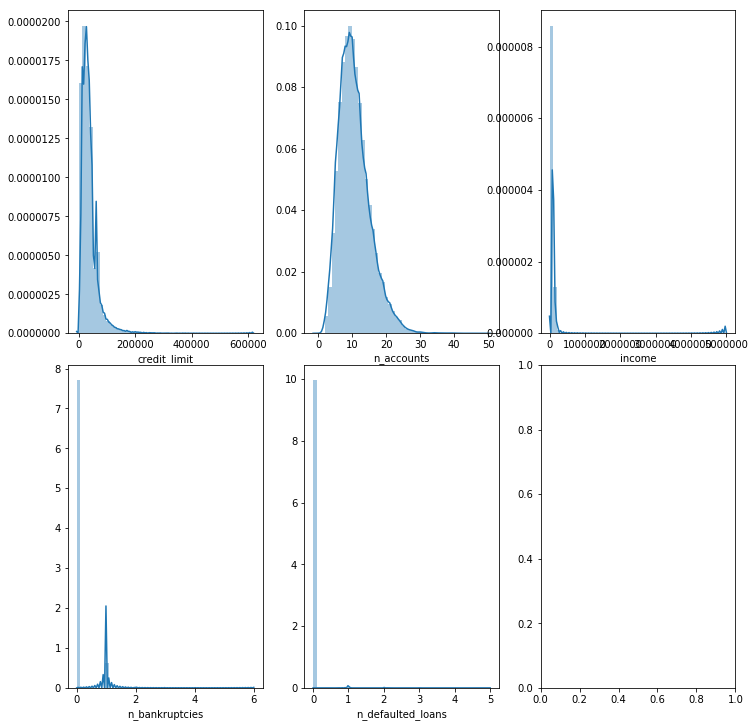

In [122]:
fig,ax = plt.subplots(figsize = (10,10),ncols = 3, nrows = 2)
plt.tight_layout()
sns.distplot( train.credit_limit,ax = ax[0,0])
sns.distplot( train.n_accounts,ax = ax[0,1])
sns.distplot( train.income,ax = ax[0,2])
sns.distplot( train.n_bankruptcies,ax = ax[1,0])
sns.distplot( train.n_defaulted_loans,ax = ax[1,1])


In [123]:
#As income is slightly right skewed. Let us transform it using log transformation and check
train.income = np.log(train.income)
test.income = np.log(test.income)

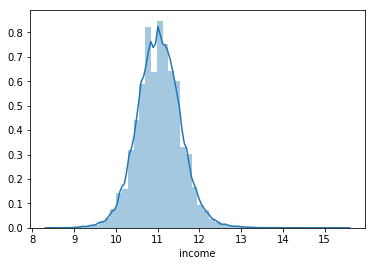

In [127]:
sns.distplot(train.income)
#Now it is normally distributed

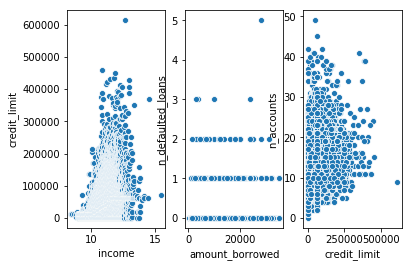

In [140]:
#Bivariate analysis
fig, ax = plt.subplots( ncols = 3)
sns.scatterplot(y = 'credit_limit', x = 'income',data = train, ax =ax[0])
sns.scatterplot(y = 'n_defaulted_loans',x='amount_borrowed',data= train,ax =ax[1])
sns.scatterplot(y = 'n_accounts',x = 'credit_limit',data = train,ax=ax[2])


In [141]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler as ss

In [142]:
ss =ss()
ss.fit(train[['score_3','score_4','score_5','score_6']])
scaled_features = pd.DataFrame(ss.transform(train[['score_3','score_4','score_5','score_6']]),columns =['score_3','score_4','score_5','score_6'])
train['sumscore'] = scaled_features['score_3']+scaled_features['score_4']+scaled_features['score_5']+scaled_features['score_6']
ss.fit(test[['score_3','score_4','score_5','score_6']])
scaled_features = pd.DataFrame(ss.transform(test[['score_3','score_4','score_5','score_6']]),columns =['score_3','score_4','score_5','score_6'])

In [143]:
test['sumscore'] = scaled_features['score_3']+scaled_features['score_4']+scaled_features['score_5']+scaled_features['score_6']
train.drop(columns = ['score_3','score_4','score_5','score_6'],inplace =True)
test.drop(columns = ['score_3','score_4','score_5','score_6'],inplace =True)

In [144]:
le = LabelEncoder()
colstrain = ['score_1', 'score_2', 'reason', 'gender','state', 'zip', 'job_name', 'real_state','default']
colstest = ['score_1', 'score_2', 'reason', 'gender','state', 'zip', 'job_name', 'real_state']

In [145]:
for items in colstrain:
    train[items] = le.fit_transform(train[items])
for items in colstest:
    test[items] = le.fit_transform(test[items])

In [146]:
def fbencode(fb):
    if fb == True:
        return 2
    elif fb == False:
        return 0
    else:
        return 1

In [147]:
train['facebook_profile'] = train['facebook_profile'].apply(fbencode)
test['facebook_profile'] = test['facebook_profile'].apply(fbencode)


In [148]:
#Class imbalance
sm = SMOTE()
train.columns
X = train[['score_1', 'score_2','sumscore', 'risk_rate','borrowed_in_months', 'gender','facebook_profile', 'state', 'real_state','n_bankruptcies', 'n_defaulted_loans', 'n_accounts','last_payment_year', 'last_payment_month', 'end_last_loan_year','end_last_loan_month']]
Y = train['default']
Y2 = train['Net']

In [149]:
x,y = sm.fit_resample(X,Y)
x = pd.DataFrame(x,columns = X.columns)
y = pd.DataFrame(y , columns =['default'])

In [150]:
#Model fitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =101)
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,Y2,test_size = 0.2,random_state =101)

In [151]:
from sklearn.linear_model import LogisticRegression,LinearRegression
glm = LogisticRegression()
glm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [152]:
predictionsglr = glm.predict(X_test)

In [153]:
glm.coef_

array([[ 0.01712325, -0.00383516,  0.04272992,  2.10232388,  0.05341117,
        -0.21266084,  0.50144629, -0.0023665 ,  0.10050743,  0.35637819,
        -0.05073348,  0.01839604, -0.90032197, -0.07755658,  0.89847471,
         0.25978216]])

In [154]:
 pd.DataFrame(glm.coef_.T,X_train.columns)

,0
score_1,0.017123
score_2,-0.003835
sumscore,0.042730
risk_rate,2.102324
borrowed_in_months,0.053411
gender,-0.212661
facebook_profile,0.501446
state,-0.002366
real_state,0.100507
n_bankruptcies,0.356378


In [155]:
from sklearn.metrics import confusion_matrix,r2_score,classification_report,mean_squared_error
from math import sqrt

In [156]:
confusion_matrix(predictionsglr,y_test)


array([[7863, 2308],
       [2263, 7749]], dtype=int64)

In [157]:
print(classification_report(predictionsglr,y_test))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77     10171
           1       0.77      0.77      0.77     10012

   micro avg       0.77      0.77      0.77     20183
   macro avg       0.77      0.77      0.77     20183
weighted avg       0.77      0.77      0.77     20183



In [158]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
predictionsdt = dt.predict(X_test)

In [159]:
confusion_matrix(predictionsdt,y_test)
print(classification_report(predictionsdt,y_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     10041
           1       0.92      0.91      0.92     10142

   micro avg       0.92      0.92      0.92     20183
   macro avg       0.92      0.92      0.92     20183
weighted avg       0.92      0.92      0.92     20183



In [160]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predictionsrf = rf.predict(X_test)

In [161]:
confusion_matrix(predictionsrf,y_test)


array([[9734,  740],
       [ 392, 9317]], dtype=int64)

In [162]:
print(classification_report(predictionsrf,y_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     10474
           1       0.93      0.96      0.94      9709

   micro avg       0.94      0.94      0.94     20183
   macro avg       0.94      0.94      0.94     20183
weighted avg       0.94      0.94      0.94     20183



In [163]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(x)
scaled_features = ss.transform(x)
X_train_scale = pd.DataFrame(scaled_features,columns = x.columns)

In [164]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train_scale,y,test_size = 0.2,random_state =101)

In [166]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
predictionsknn = knn.predict(X_test)

In [167]:
confusion_matrix(y_test,predictionsknn)

array([[7752, 2374],
       [ 366, 9691]], dtype=int64)

In [168]:
print(classification_report(y_test,predictionsknn))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85     10126
           1       0.80      0.96      0.88     10057

   micro avg       0.86      0.86      0.86     20183
   macro avg       0.88      0.86      0.86     20183
weighted avg       0.88      0.86      0.86     20183



In [169]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
predictionssvc = svc.predict(X_test)

In [170]:
confusion_matrix(y_test,predictionssvc)
print(classification_report(y_test,predictionssvc))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     10126
           1       0.86      0.87      0.86     10057

   micro avg       0.86      0.86      0.86     20183
   macro avg       0.86      0.86      0.86     20183
weighted avg       0.86      0.86      0.86     20183

